<a href="https://colab.research.google.com/github/Andrelodju/portfolio/blob/main/ExportSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [63]:
exportsale=pd.read_csv("/content/ExportSales.csv")
exportsale.columns = exportsale.columns.str.strip()

In [64]:
print(exportsale.head)

<bound method NDFrame.head of            ID        Date   Category  Invoice Number  Product Code  \
0     2529604  2019-04-28  Category5             267      30011006   
1     2529605  2019-04-29  Category5             302      30011006   
2     2529606  2019-05-13  Category5             507      30011006   
3     2529607  2019-06-01  Category5             795      30011006   
4     2529608  2019-07-03  Category5            1184      30011006   
...       ...         ...        ...             ...           ...   
7806  2537410  2022-09-14  Category7             221      30006046   
7807  2537411  2022-09-14  Category7             221      30006045   
7808  2537412  2022-09-19  Category7             222      30006045   
7809  2537413  2022-09-19  Category7             223      30006003   
7810  2537414  2022-09-19  Category7             223      30006030   

      Customer Code Destenation   QTY  Total Price  
0               612         IRQ   750    3334.8225  
1               514    

In [19]:
# Conversão da coluna data
exportsale['Date'] = pd.to_datetime(exportsale['Date'], errors="coerce")

# Agrupar por dia
qty_dia = exportsale.groupby(exportsale['Date'].dt.date)["QTY"].sum()
#Agrupar por mês
qty_mes = exportsale.groupby(exportsale['Date'].dt.to_period("M"))["QTY"].sum()
#Agrupar por ano
qty_ano = exportsale.groupby(exportsale['Date'].dt.year)["QTY"].sum()
print(qty_dia.size)

341


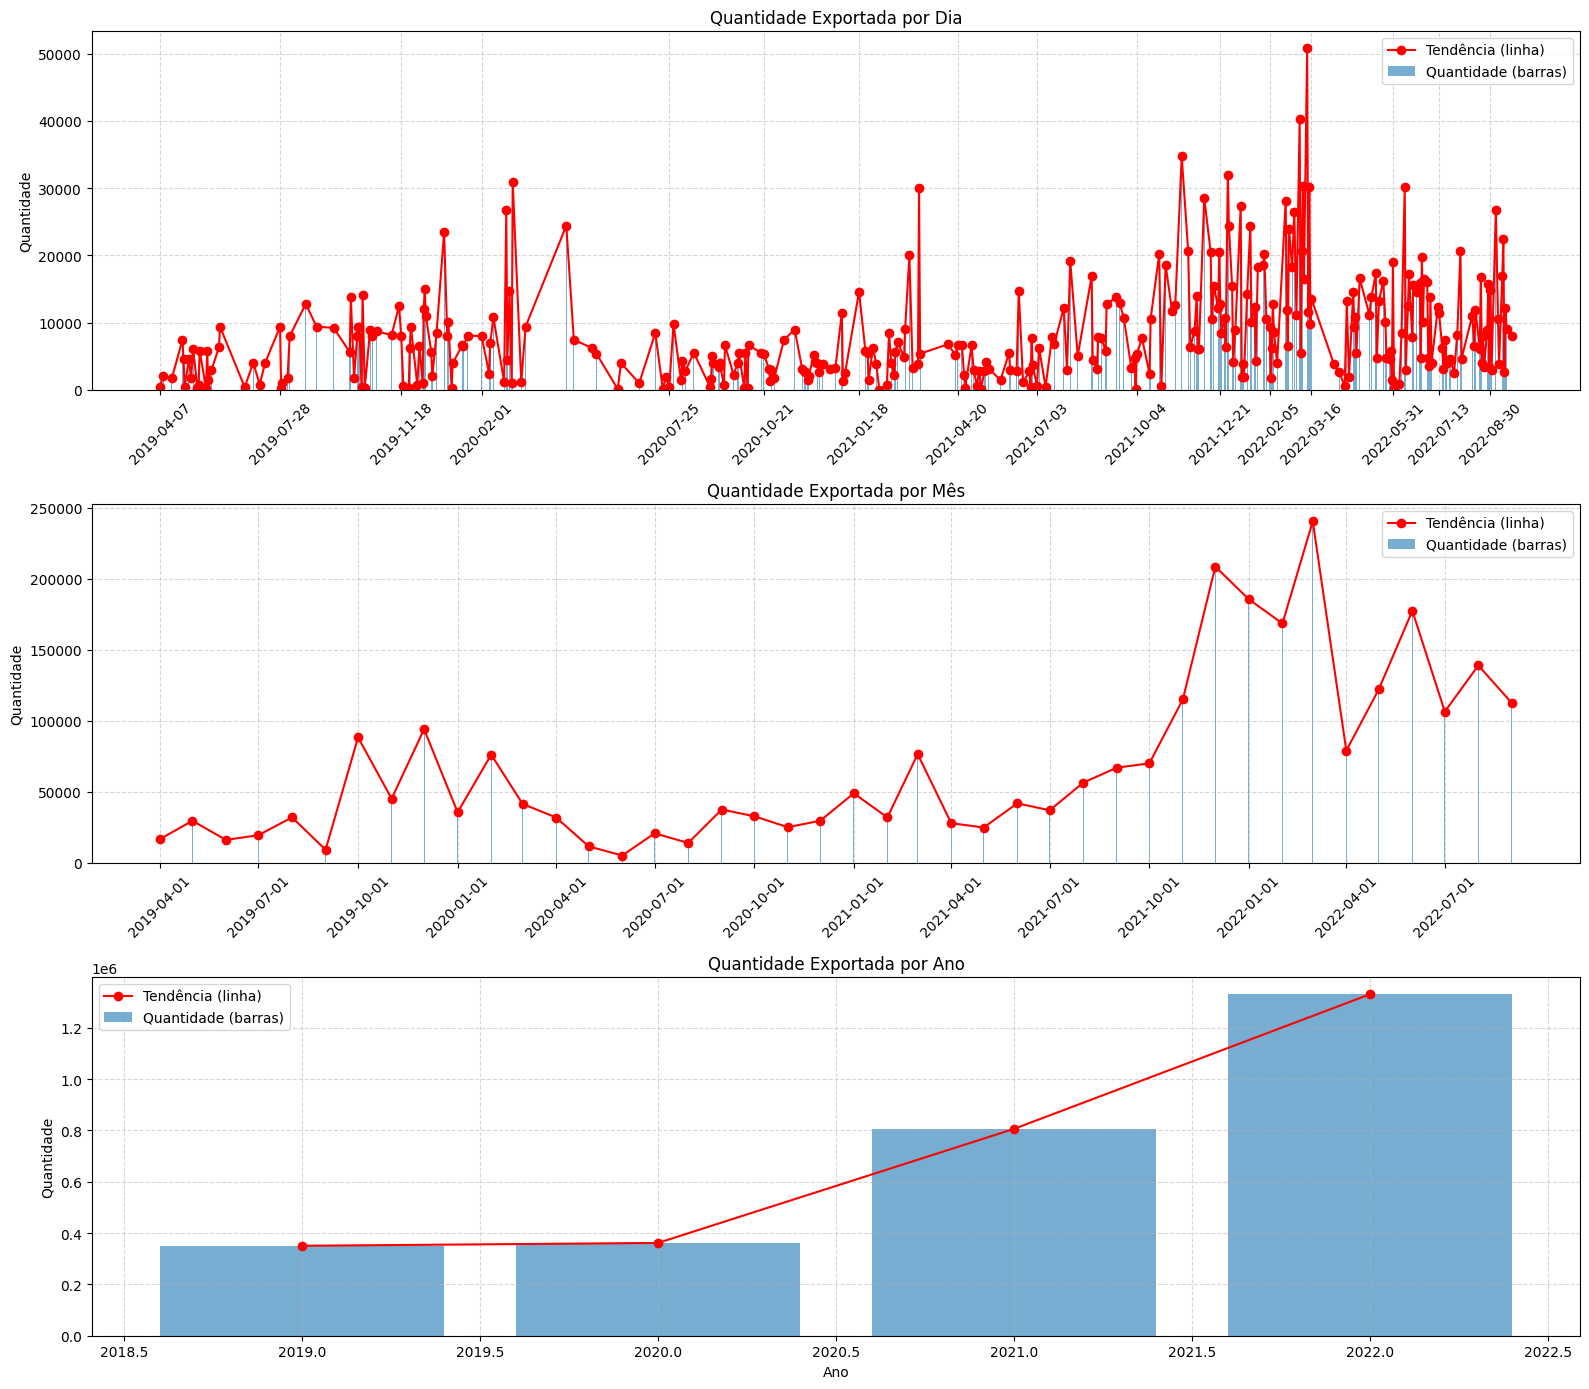

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

#  Gráfico combinado - Dia
axes[0].bar(qty_dia.index, qty_dia.values, alpha=0.6, label="Quantidade (barras)")
axes[0].plot(qty_dia.index, qty_dia.values, marker="o", color="red", label="Tendência (linha)")
axes[0].set_title("Quantidade Exportada por Dia")
axes[0].set_ylabel("Quantidade")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].set_xticks(qty_dia.index[::max(1, len(qty_dia)//15)])  # menos labels
axes[0].tick_params(axis="x", rotation=45)

#  Gráfico combinado - Mês
qty_mes.index = qty_mes.index.to_timestamp()
axes[1].bar(qty_mes.index, qty_mes.values, alpha=0.6, label="Quantidade (barras)")
axes[1].plot(qty_mes.index, qty_mes.values, marker="o", color="red", label="Tendência (linha)")
axes[1].set_title("Quantidade Exportada por Mês")
axes[1].set_ylabel("Quantidade")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].set_xticks(qty_mes.index[::max(1, len(qty_mes)//12)])
axes[1].tick_params(axis="x", rotation=45)

# Gráfico combinado - Ano
axes[2].bar(qty_ano.index, qty_ano.values, alpha=0.6, label="Quantidade (barras)")
axes[2].plot(qty_ano.index, qty_ano.values, marker="o", color="red", label="Tendência (linha)")
axes[2].set_title("Quantidade Exportada por Ano")
axes[2].set_ylabel("Quantidade")
axes[2].set_xlabel("Ano")
axes[2].legend()
axes[2].grid(True, linestyle="--", alpha=0.5)

# Mostrar tudo
plt.tight_layout()
plt.show()

Com base nos gráficos acima podemos notar um aumento gradual das exportações com pequenos ciclos de alta no periodo de 2019-2022 que podem se justificar devido a epidemia de covid-19 ocorrida no periodo, o aumento rápido que vemos pós mês 10 de 2021 pode ser inferido como devido a queda acentuada dos casos da mesma e a reabertura maior ao comércio global com fins de restrições levando a maior fluxo, já a queda em 2022 pode ser inferida como motivada pelo fim da euforia da reabertura e reequilibrio de mercado e estabilização de preços

In [30]:
#tabela para organizar destinos
tabela_destinos = (
    exportsale
    .groupby("Destenation", as_index=False)
    .agg({
        "QTY": "sum",
        "Total Price": "sum"
    })
    .sort_values(by="QTY", ascending=False)
)

In [33]:
#Calculo do ticket médio
tabela_destinos["Ticket Médio"] = tabela_destinos["Total Price"] / tabela_destinos["QTY"]
tabela_destinos = tabela_destinos.sort_values(by="QTY", ascending=False)

In [35]:
try:
    import IPython.display as display
    display.display(tabela_destinos)
except:
    pass

,Destenation,QTY,Total Price,Ticket Médio
9,IRQ,1775086,1.573178e+07,8.862543
2,AZE,495128,2.971643e+06,6.001768
0,AFG,205460,1.719392e+06,8.368498
20,PAK,114251,7.163142e+05,6.269654
3,BHR,63120,8.477673e+05,13.431041
5,CHN,27173,6.871990e+04,2.528977
1,AUS,23911,2.057682e+05,8.605589
22,ROU,21841,2.986699e+05,13.674734
26,TKM,20045,1.165729e+05,5.815560
27,UAE,16621,2.126033e+05,12.791248


In [40]:
fig = px.pie(
    tabela_destinos,
    names="Destenation",
    values="QTY",
    title="Distribuição da Quantidade Exportada por Destino",
    hover_data={"QTY": True, "Total Price": True},
)

# Adicionar porcentagem + label + valor dentro do gráfico
fig.update_traces(textposition='inside', textinfo='percent+label+value')

# ---- 5. Mostrar gráfico ----
fig.show()


In [42]:
def detectar_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [43]:
outliers_qty, lb_qty, ub_qty = detectar_outliers_iqr(exportsale, "QTY")
print(f"Outliers detectados em QTY (valores fora de {lb_qty:.2f} - {ub_qty:.2f}):")
print(outliers_qty[["ID", "Date", "Destenation", "Product Code", "QTY", "Total Price"]])

Outliers detectados em QTY (valores fora de -525.00 - 955.00):
           ID       Date Destenation  Product Code   QTY  Total Price
31    2529635 2020-04-27         IRQ      30011006  1300    7848.3600
32    2529636 2020-04-27         IRQ      30011006  1300    7848.3600
339   2529943 2020-01-14         AFG      30001095  1080    9359.1180
340   2529944 2020-01-14         AFG      30001095  1080    9359.1180
378   2529982 2020-01-14         AFG      30001096  1080    9359.1180
...       ...        ...         ...           ...   ...          ...
7804  2537408 2022-09-14         IRQ      30006045  1500   16301.2500
7806  2537410 2022-09-14         IRQ      30006046  1203   13073.6025
7807  2537411 2022-09-14         IRQ      30006045  1087   11812.9725
7808  2537412 2022-09-19         IRQ      30006045  3300   36204.3000
7809  2537413 2022-09-19         AZE      30006003  4182   38566.4040

[936 rows x 6 columns]


In [45]:
outliers_qty, lb_qty, ub_qty = detectar_outliers_iqr(exportsale, "QTY")
print(f"Outliers detectados em QTY (valores fora de {lb_qty:.2f} - {ub_qty:.2f}):")
print(outliers_qty[["ID", "Date", "Destenation", "Product Code", "QTY", "Total Price"]])

Outliers detectados em QTY (valores fora de -525.00 - 955.00):
           ID       Date Destenation  Product Code   QTY  Total Price
31    2529635 2020-04-27         IRQ      30011006  1300    7848.3600
32    2529636 2020-04-27         IRQ      30011006  1300    7848.3600
339   2529943 2020-01-14         AFG      30001095  1080    9359.1180
340   2529944 2020-01-14         AFG      30001095  1080    9359.1180
378   2529982 2020-01-14         AFG      30001096  1080    9359.1180
...       ...        ...         ...           ...   ...          ...
7804  2537408 2022-09-14         IRQ      30006045  1500   16301.2500
7806  2537410 2022-09-14         IRQ      30006046  1203   13073.6025
7807  2537411 2022-09-14         IRQ      30006045  1087   11812.9725
7808  2537412 2022-09-19         IRQ      30006045  3300   36204.3000
7809  2537413 2022-09-19         AZE      30006003  4182   38566.4040

[936 rows x 6 columns]


In [46]:
outliers_price, lb_price, ub_price = detectar_outliers_iqr(exportsale, "Total Price")
print(f"\nOutliers detectados em Total Price (valores fora de {lb_price:.2f} - {ub_price:.2f}):")
print(outliers_price[["ID", "Date", "Destenation", "Product Code", "QTY", "Total Price"]])



Outliers detectados em Total Price (valores fora de -4101.13 - 7838.07):
           ID       Date Destenation  Product Code   QTY  Total Price
31    2529635 2020-04-27         IRQ      30011006  1300    7848.3600
32    2529636 2020-04-27         IRQ      30011006  1300    7848.3600
339   2529943 2020-01-14         AFG      30001095  1080    9359.1180
340   2529944 2020-01-14         AFG      30001095  1080    9359.1180
378   2529982 2020-01-14         AFG      30001096  1080    9359.1180
...       ...        ...         ...           ...   ...          ...
7804  2537408 2022-09-14         IRQ      30006045  1500   16301.2500
7806  2537410 2022-09-14         IRQ      30006046  1203   13073.6025
7807  2537411 2022-09-14         IRQ      30006045  1087   11812.9725
7808  2537412 2022-09-19         IRQ      30006045  3300   36204.3000
7809  2537413 2022-09-19         AZE      30006003  4182   38566.4040

[866 rows x 6 columns]


In [48]:
fig = px.box(
    exportsale,
    x="Destenation",
    y="QTY",
    points="all",  # mostra todos os pontos (inclui outliers)
    title="Boxplot de QTY por Destino"
)

fig.update_layout(xaxis_title="Destino", yaxis_title="Quantidade (QTY)")
fig.show()

In [50]:
exportsale['Destenation_Code'] = exportsale['Destenation'].astype('category').cat.codes
dados_corr = exportsale[['Destenation_Code', 'QTY', 'Total Price']]
matriz_correlacao = dados_corr.corr()

In [52]:
fig = px.imshow(
    matriz_correlacao,
    text_auto=True,
    color_continuous_scale="Blues",
    title="Matriz de Correlação: Destino, QTY e Total Price"
)

fig.show()

In [54]:
fig = px.scatter(
    exportsale,
    x="QTY",
    y="Total Price",
    color="Destenation",
    hover_data=["Invoice Number", "Product Code", "Customer Code"],
    title="Relação entre Quantidade (QTY) e Total Price por Destino",
    size="QTY",
    opacity=0.7
)

fig.update_layout(
    xaxis_title="Quantidade Exportada (QTY)",
    yaxis_title="Valor Total (Total Price)"
)

fig.show()


In [65]:
exportsale["Date"] = pd.to_datetime(exportsale["Date"], errors="coerce")
exportsale = exportsale.dropna(subset=["Date", "QTY", "Total Price"])

In [66]:
exportsale["Year"] = exportsale["Date"].dt.year
exportsale["Month"] = exportsale["Date"].dt.month
exportsale["Day"] = exportsale["Date"].dt.day


In [76]:
#Selecionar Features e target
categorical_cols = ["Category", "Product Code", "Customer Code", "Destenation"]
numerical_cols = ["QTY", "Year", "Month", "Day"]

X_cat = exportsale[categorical_cols]
X_num = exportsale[numerical_cols]


In [73]:
#combinar features
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat_encoded = pd.DataFrame(
    encoder.fit_transform(X_cat),
    columns=encoder.get_feature_names_out(categorical_cols)
)

In [77]:
#Combinar features numéricas e categóricas
X = pd.concat([X_num.reset_index(drop=True), X_cat_encoded.reset_index(drop=True)], axis=1)
y = exportsale["Total Price"].reset_index(drop=True)

In [78]:
#Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
#Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [85]:
#Prever e Calcular métricas
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # versão compatível
r2 = r2_score(y_test, y_pred)

print("===== Métricas do Modelo =====")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

===== Métricas do Modelo =====
MAE: 1065.71
MSE: 3602740.89
RMSE: 1898.09
R²: 0.87


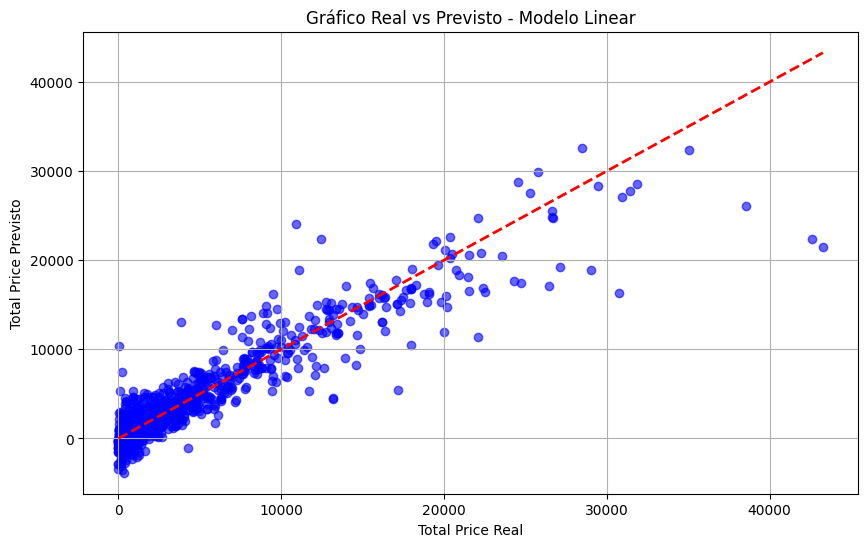

In [86]:
# Criar gráfico Real vs Previsto
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # linha de referência y=x
plt.xlabel("Total Price Real")
plt.ylabel("Total Price Previsto")
plt.title("Gráfico Real vs Previsto - Modelo Linear")
plt.grid(True)
plt.show()

In [88]:
#Treino Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [89]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== Métricas Random Forest =====")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


===== Métricas Random Forest =====
MAE: 358.05
MSE: 1539750.50
RMSE: 1240.87
R²: 0.95


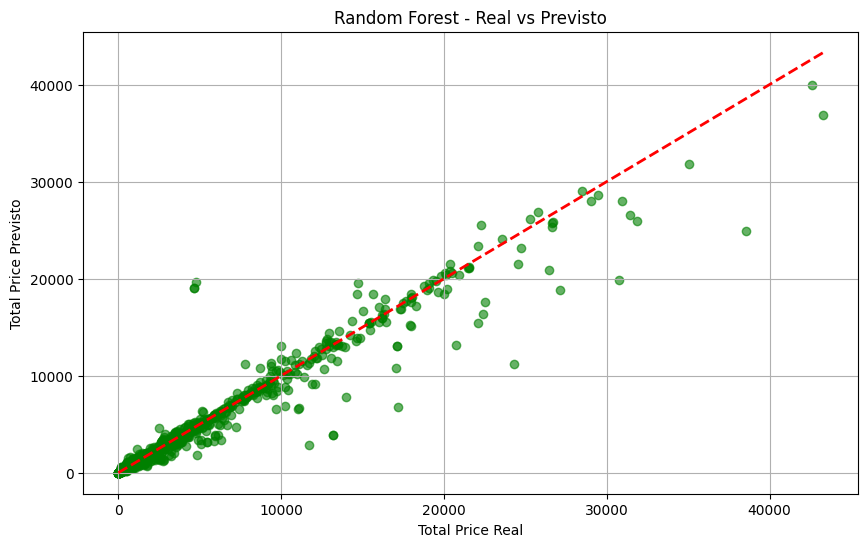

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Total Price Real")
plt.ylabel("Total Price Previsto")
plt.title("Random Forest - Real vs Previsto")
plt.grid(True)
plt.show()